<a href="https://colab.research.google.com/github/StarkArk/Tailored_Tails/blob/main/final_project_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import the required modules
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix

In [3]:
# Read the preprocessed_doggy file into a DataFrame
doggy_df = pd.read_csv(
    Path("preprocessed_doggy.csv")
)

# Review the DataFrame
display(customer_df.head())
display(customer_df.tail())

,Unnamed: 0,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost,Breed
0,0,Bronx,Yes,middle,0.4,0.4,0.8,0.8,1.0,Small 9-35lb,0.6,Low,Boxer
1,1,Manhattan,Yes,high,0.8,0.2,0.6,0.6,1.0,Toy >9lb,0.8,Medium,Maltese
2,2,Manhattan,Yes,high,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium,Yorkshire Terrier
3,3,Brooklyn,Yes,low,0.4,0.8,0.6,1.0,0.6,Small 9-35lb,0.4,Low,German Shepherd Dog
4,4,Brooklyn,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium,Cavalier King Charles Spaniel


,Unnamed: 0,Borough,dog_friendly,income_cat,grooming_frequency,shedding,energy_level,trainability,demeanor,size,life_expectancy,lifetime_cost,Breed
275750,275750,Queens,Yes,middle,1.0,0.2,0.6,0.2,0.8,Toy >9lb,0.8,Medium,Yorkshire Terrier
275751,275751,Manhattan,Yes,high,0.4,0.4,0.4,1.0,0.8,Toy >9lb,0.8,Medium,Cavalier King Charles Spaniel
275752,275752,Brooklyn,No,middle,0.2,0.4,0.6,0.4,0.6,Toy >9lb,1.0,High,Chihuahua
275753,275753,Staten Island,No,middle,0.4,0.8,1.0,1.0,1.0,Small 9-35lb,0.6,Medium,Labrador Retriever
275754,275754,Queens,No,middle,0.4,0.2,0.6,1.0,1.0,Toy >9lb,0.8,Low,Boston Terrier


In [7]:
# Split the data into features(X) and targets(y)
# First y
y = doggy_df['Breed']

# Next X
X = doggy_df.drop(columns=['Breed'])

In [8]:
# Use get_dummies to convert category types to numbers
y = pd.get_dummies(y, dtype=int)

X = pd.get_dummies(X, dtype=int)

In [10]:
display(y.sample(10))
display(X.head(3))

,Australian Cattle Dog,Australian Shepherd,Basset Hound,Beagle,Belgian Malinois,Bernese Mountain Dog,Bichon Frise,Bloodhound,Border Collie,Boston Terrier,...,Rhodesian Ridgeback,Rottweiler,Shetland Sheepdog,Shiba Inu,Shih Tzu,Siberian Husky,Vizsla,Weimaraner,West Highland White Terrier,Yorkshire Terrier
115680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
185060,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,grooming_frequency,shedding,energy_level,trainability,demeanor,life_expectancy,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,...,income_cat_low,income_cat_middle,size_Giant <75lb,size_Large 55-75lb,size_Medium 35-55lb,size_Small 9-35lb,size_Toy >9lb,lifetime_cost_High,lifetime_cost_Low,lifetime_cost_Medium
0,0,0.4,0.4,0.8,0.8,1.0,0.6,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0.8,0.2,0.6,0.6,1.0,0.8,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2,1.0,0.2,0.6,0.2,0.8,0.8,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [13]:
# Features
X.shape

(275755, 25)

In [14]:
# Target
y.shape

(275755, 50)

In [15]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Create multi_output classifier using logistic regression model.
# Use a random_state of 42 to the model
lr_model = MultiOutputClassifier(LogisticRegression(random_state=42))

# Fit and save the logistic regression model using the training data
lr_model = lr_model.fit(X_train, y_train)

# Predict
training_predictions = lr_model.predict(X_train)

testing_predictions = lr_model.predict(X_test)

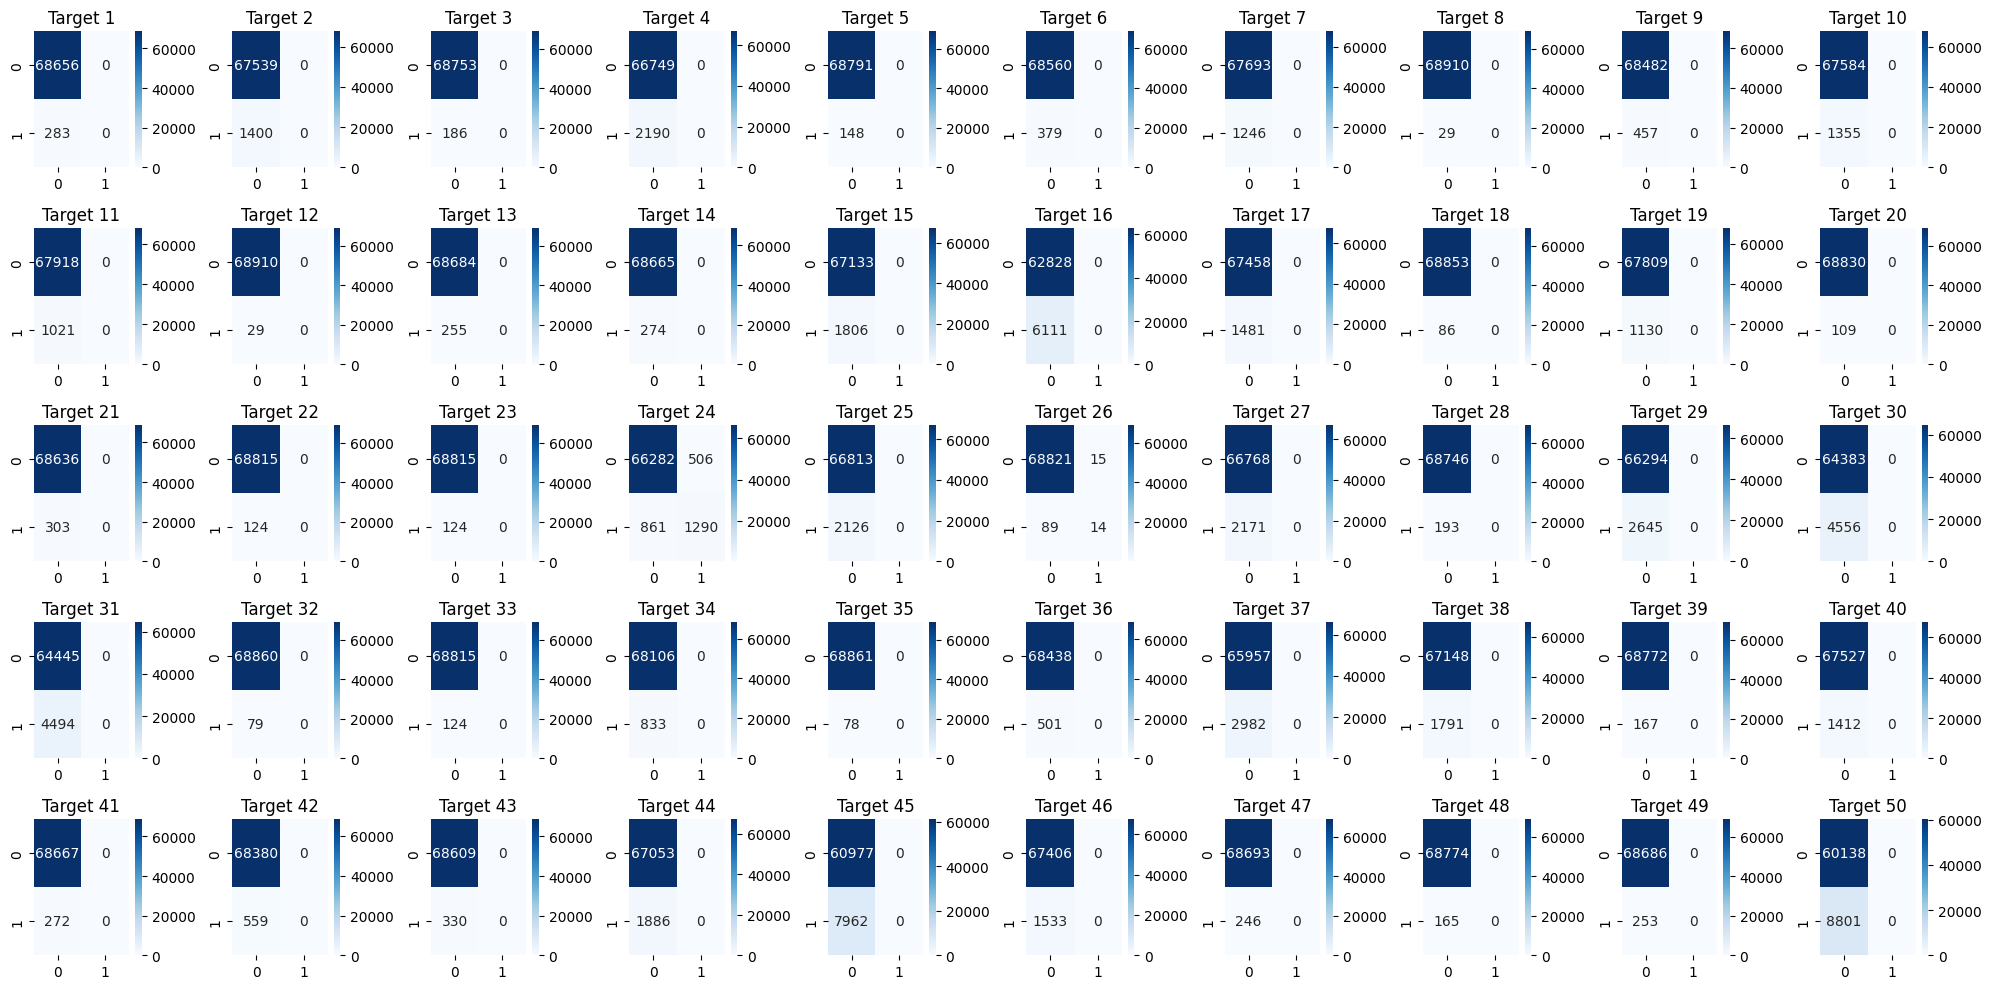

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming lr_model is the MultiOutputClassifier from the "Binary Relevance" example

# Predictions
y_pred = lr_model.predict(X_test)

# Convert y_test and y_pred to NumPy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Get the confusion matrix for each target
confusion_matrices = []
for i in range(y_test_np.shape[1]):
    cm = confusion_matrix(y_test_np[:, i], y_pred_np[:, i])
    confusion_matrices.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))

for i in range(len(confusion_matrices)):
    row = i // 10
    col = i % 10
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", ax=axes[row, col])
    axes[row, col].set_title(f"Target {i+1}")

plt.tight_layout()
plt.show()